## 1. Data ingestion ,  understanding and cleaning

In [ ]:
## 1.1 Prepa

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


In [2]:
# Importing the dataset
dataset_train = pd.read_csv(r"C:\Veeresh\A-Interview-Projects\Upgrad\train.csv")
dataset_test = pd.read_csv(r"C:\Veeresh\A-Interview-Projects\Upgrad\test.csv")


,index,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,0,1,BRONZE,6,YES,NO,A40,A65,A75,852,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,2,SILVER,48,YES,YES,A40,A61,A73,2400,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,2,3,BRONZE,12,YES,NO,A46,A61,A74,2078,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,3,4,BRONZE,42,YES,YES,A40,A61,A74,2380,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,4,5,BRONZE,24,YES,NO,A40,A61,A73,1756,...,4,A124,53,A143,A153,2,A173,2,A191,A201


### 1.1 Understanding the data and working on data 

In [ ]:
dataset.head(5)
dataset.describe()

# separting the target from the independant variable
target = dataset_train.credit_amount
dataset_train.drop(['credit_amount'],axis = 1 , inplace = True)

# combining the test and train data set
dataset = dataset_train.append(dataset_test)
dataset.reset_index(inplace=True)

# removing the Saving account as it has got 127 NAN and has  same information is catpured through savings account
dataset.drop(['Saving Account'],axis = 1 , inplace = True)
dataset = dataset.fillna(dataset["account_info"].value_counts().index[0])

### 1.2 Cleaning the Data 

In [ ]:
# function for getting the columns which are are not having missing values 
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [4]:
num_cols = get_cols_with_no_nans(dataset , 'num')
cat_cols = get_cols_with_no_nans(dataset , 'no_num')
dataset.head(5)
 

,index,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,0,1,BRONZE,6,YES,NO,A40,A65,A75,852,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,2,SILVER,48,YES,YES,A40,A61,A73,2400,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,2,3,BRONZE,12,YES,NO,A46,A61,A74,2078,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,3,4,BRONZE,42,YES,YES,A40,A61,A74,2380,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,4,5,BRONZE,24,YES,NO,A40,A61,A73,1756,...,4,A124,53,A143,A153,2,A173,2,A191,A201


### 1.3 Explorative Data Analytics

Number of numerical columns with no nan values : 9
Number of nun-numerical columns with no nan values : 15


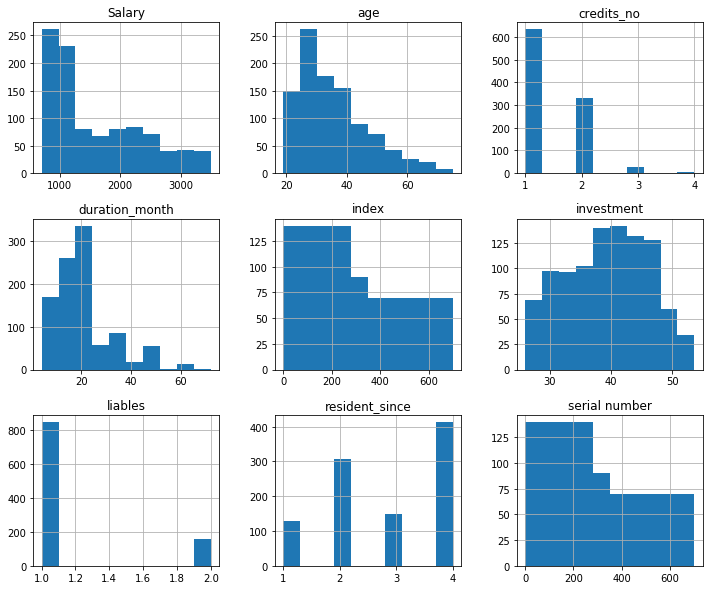

In [5]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))
dataset = dataset[num_cols + cat_cols]
dataset.hist(figsize = (12,10))
plt.show()

### 1.4 Data Processing and Feature Engineering

In [6]:
# converting the liables and Credit_no as the 1, 0 values 

dataset.liables.replace((2, 1), (1, 0), inplace=True)
dataset.credits_no.replace((2, 1), (1, 0), inplace=True)
dataset.head(5)

,index,serial number,duration_month,Salary,investment,resident_since,age,credits_no,liables,account_info,...,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
0,0,1,6,852,34.08,4,67,1,0,BRONZE,...,A75,M,Umarried,A101,A121,A143,A152,A173,A192,A201
1,1,2,48,2400,48.00,2,22,0,0,SILVER,...,A73,F,Divorced,A101,A121,A143,A152,A173,A191,A201
2,2,3,12,2078,41.56,3,49,0,1,BRONZE,...,A74,M,Umarried,A101,A121,A143,A152,A172,A191,A201
3,3,4,42,2380,47.60,4,45,0,1,BRONZE,...,A74,M,Umarried,A103,A122,A143,A153,A173,A191,A201
4,4,5,24,1756,52.68,4,53,1,1,BRONZE,...,A73,M,Umarried,A101,A124,A143,A153,A173,A191,A201


In [8]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(dataset.shape[1]))
dataset = oneHotEncode(dataset, cat_cols)
print('There are {} columns after encoding categorical features'.format(dataset.shape[1]))

There were 24 columns before encoding categorical features
There are 57 columns after encoding categorical features


In [14]:
# splitting the data for the model as train and test
def split_combined():
    global combined
    train = dataset[:700]
    test = dataset[700:]

    return train , test 
  
train, test = split_combined()

## 2. Preparing the model 

In [15]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               7424      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 238,081
Trainable params: 238,081
Non-trainable params: 0
________________________________________________

### 2.1  executing model with problem data 

In [16]:

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [17]:
NN_model.fit(train, target, epochs=400, batch_size=10, validation_split = 0.2, callbacks=callbacks_list)


Train on 560 samples, validate on 140 samples
Epoch 1/400
560/560 [==============================] - 0s 817us/step - loss: 2149.3220 - mean_absolute_error: 2149.3220 - val_loss: 1601.7351 - val_mean_absolute_error: 1601.7350

Epoch 00001: val_loss improved from inf to 1601.73512, saving model to Weights-001--1601.73512.hdf5
Epoch 2/400
560/560 [==============================] - 0s 476us/step - loss: 1837.2431 - mean_absolute_error: 1837.2428 - val_loss: 1599.6675 - val_mean_absolute_error: 1599.6676

Epoch 00002: val_loss improved from 1601.73512 to 1599.66753, saving model to Weights-002--1599.66753.hdf5
Epoch 3/400
560/560 [==============================] - 0s 504us/step - loss: 1822.2699 - mean_absolute_error: 1822.2701 - val_loss: 1688.9401 - val_mean_absolute_error: 1688.9399

Epoch 00003: val_loss did not improve from 1599.66753
Epoch 4/400
560/560 [==============================] - 0s 500us/step - loss: 1814.6137 - mean_absolute_error: 1814.6139 - val_loss: 1555.8840 - val_mean_

560/560 [==============================] - 0s 593us/step - loss: 1276.3319 - mean_absolute_error: 1276.3322 - val_loss: 1050.9743 - val_mean_absolute_error: 1050.9744

Epoch 00033: val_loss did not improve from 1048.01131
Epoch 34/400
560/560 [==============================] - 0s 671us/step - loss: 1234.6752 - mean_absolute_error: 1234.6752 - val_loss: 1028.3682 - val_mean_absolute_error: 1028.3683

Epoch 00034: val_loss improved from 1048.01131 to 1028.36820, saving model to Weights-034--1028.36820.hdf5
Epoch 35/400
560/560 [==============================] - 0s 573us/step - loss: 1241.3503 - mean_absolute_error: 1241.3501 - val_loss: 1185.8084 - val_mean_absolute_error: 1185.8085

Epoch 00035: val_loss did not improve from 1028.36820
Epoch 36/400
560/560 [==============================] - 0s 545us/step - loss: 1298.5353 - mean_absolute_error: 1298.5356 - val_loss: 1032.6310 - val_mean_absolute_error: 1032.6310

Epoch 00036: val_loss did not improve from 1028.36820
Epoch 37/400
560/560

560/560 [==============================] - 0s 626us/step - loss: 1217.7242 - mean_absolute_error: 1217.7241 - val_loss: 1018.1102 - val_mean_absolute_error: 1018.1102

Epoch 00067: val_loss did not improve from 1002.22303
Epoch 68/400
560/560 [==============================] - 0s 691us/step - loss: 1146.0935 - mean_absolute_error: 1146.0934 - val_loss: 1024.2919 - val_mean_absolute_error: 1024.2919

Epoch 00068: val_loss did not improve from 1002.22303
Epoch 69/400
560/560 [==============================] - 0s 750us/step - loss: 1148.3561 - mean_absolute_error: 1148.3561 - val_loss: 1098.9453 - val_mean_absolute_error: 1098.9453

Epoch 00069: val_loss did not improve from 1002.22303
Epoch 70/400
560/560 [==============================] - 0s 668us/step - loss: 1170.8991 - mean_absolute_error: 1170.8993 - val_loss: 1273.0368 - val_mean_absolute_error: 1273.0369

Epoch 00070: val_loss did not improve from 1002.22303
Epoch 71/400
560/560 [==============================] - 0s 650us/step - l

560/560 [==============================] - 0s 625us/step - loss: 1094.8236 - mean_absolute_error: 1094.8236 - val_loss: 1055.7019 - val_mean_absolute_error: 1055.7020

Epoch 00101: val_loss did not improve from 964.92873
Epoch 102/400
560/560 [==============================] - 0s 625us/step - loss: 1116.2412 - mean_absolute_error: 1116.2408 - val_loss: 974.7815 - val_mean_absolute_error: 974.7814

Epoch 00102: val_loss did not improve from 964.92873
Epoch 103/400
560/560 [==============================] - 0s 702us/step - loss: 1093.4110 - mean_absolute_error: 1093.4110 - val_loss: 957.3959 - val_mean_absolute_error: 957.3960

Epoch 00103: val_loss improved from 964.92873 to 957.39593, saving model to Weights-103--957.39593.hdf5
Epoch 104/400
560/560 [==============================] - 0s 658us/step - loss: 1119.8581 - mean_absolute_error: 1119.8579 - val_loss: 972.4223 - val_mean_absolute_error: 972.4222

Epoch 00104: val_loss did not improve from 957.39593
Epoch 105/400
560/560 [======


Epoch 00135: val_loss did not improve from 945.18744
Epoch 136/400
560/560 [==============================] - 0s 575us/step - loss: 1153.5344 - mean_absolute_error: 1153.5344 - val_loss: 1040.7338 - val_mean_absolute_error: 1040.7338

Epoch 00136: val_loss did not improve from 945.18744
Epoch 137/400
560/560 [==============================] - 0s 640us/step - loss: 1082.1774 - mean_absolute_error: 1082.1772 - val_loss: 1021.2631 - val_mean_absolute_error: 1021.2631

Epoch 00137: val_loss did not improve from 945.18744
Epoch 138/400
560/560 [==============================] - 0s 727us/step - loss: 1094.4685 - mean_absolute_error: 1094.4686 - val_loss: 1039.9247 - val_mean_absolute_error: 1039.9247

Epoch 00138: val_loss did not improve from 945.18744
Epoch 139/400
560/560 [==============================] - 0s 676us/step - loss: 1102.9717 - mean_absolute_error: 1102.9717 - val_loss: 1340.7375 - val_mean_absolute_error: 1340.7375

Epoch 00139: val_loss did not improve from 945.18744
Epoch 


Epoch 00170: val_loss did not improve from 941.73309
Epoch 171/400
560/560 [==============================] - 0s 723us/step - loss: 1035.4731 - mean_absolute_error: 1035.4730 - val_loss: 1005.2023 - val_mean_absolute_error: 1005.2023

Epoch 00171: val_loss did not improve from 941.73309
Epoch 172/400
560/560 [==============================] - 0s 685us/step - loss: 1099.6541 - mean_absolute_error: 1099.6541 - val_loss: 1136.2597 - val_mean_absolute_error: 1136.2596

Epoch 00172: val_loss did not improve from 941.73309
Epoch 173/400
560/560 [==============================] - 0s 727us/step - loss: 1036.4303 - mean_absolute_error: 1036.4303 - val_loss: 1089.1144 - val_mean_absolute_error: 1089.1145

Epoch 00173: val_loss did not improve from 941.73309
Epoch 174/400
560/560 [==============================] - 0s 780us/step - loss: 1074.5684 - mean_absolute_error: 1074.5685 - val_loss: 1008.0808 - val_mean_absolute_error: 1008.0807

Epoch 00174: val_loss did not improve from 941.73309
Epoch 


Epoch 00205: val_loss did not improve from 941.73309
Epoch 206/400
560/560 [==============================] - 0s 739us/step - loss: 1022.6480 - mean_absolute_error: 1022.6481 - val_loss: 963.9350 - val_mean_absolute_error: 963.9349

Epoch 00206: val_loss did not improve from 941.73309
Epoch 207/400
560/560 [==============================] - 0s 664us/step - loss: 1008.7280 - mean_absolute_error: 1008.7281 - val_loss: 962.3867 - val_mean_absolute_error: 962.3867

Epoch 00207: val_loss did not improve from 941.73309
Epoch 208/400
560/560 [==============================] - 0s 653us/step - loss: 1037.8631 - mean_absolute_error: 1037.8632 - val_loss: 1057.5475 - val_mean_absolute_error: 1057.5475

Epoch 00208: val_loss did not improve from 941.73309
Epoch 209/400
560/560 [==============================] - 0s 683us/step - loss: 1051.8531 - mean_absolute_error: 1051.8533 - val_loss: 1105.3208 - val_mean_absolute_error: 1105.3208

Epoch 00209: val_loss did not improve from 941.73309
Epoch 210/

560/560 [==============================] - 0s 622us/step - loss: 958.6923 - mean_absolute_error: 958.6923 - val_loss: 1046.1777 - val_mean_absolute_error: 1046.1777

Epoch 00241: val_loss did not improve from 941.73309
Epoch 242/400
560/560 [==============================] - 0s 641us/step - loss: 1004.8480 - mean_absolute_error: 1004.8479 - val_loss: 1030.9812 - val_mean_absolute_error: 1030.9811

Epoch 00242: val_loss did not improve from 941.73309
Epoch 243/400
560/560 [==============================] - 0s 605us/step - loss: 1025.2094 - mean_absolute_error: 1025.2092 - val_loss: 1097.9589 - val_mean_absolute_error: 1097.9590

Epoch 00243: val_loss did not improve from 941.73309
Epoch 244/400
560/560 [==============================] - 0s 605us/step - loss: 967.6860 - mean_absolute_error: 967.6860 - val_loss: 1044.7665 - val_mean_absolute_error: 1044.7665

Epoch 00244: val_loss did not improve from 941.73309
Epoch 245/400
560/560 [==============================] - 0s 641us/step - loss:

560/560 [==============================] - 0s 615us/step - loss: 995.2811 - mean_absolute_error: 995.2811 - val_loss: 1008.6615 - val_mean_absolute_error: 1008.6615

Epoch 00276: val_loss did not improve from 941.73309
Epoch 277/400
560/560 [==============================] - 0s 596us/step - loss: 969.3666 - mean_absolute_error: 969.3666 - val_loss: 1018.2620 - val_mean_absolute_error: 1018.2620

Epoch 00277: val_loss did not improve from 941.73309
Epoch 278/400
560/560 [==============================] - 0s 548us/step - loss: 1052.3578 - mean_absolute_error: 1052.3578 - val_loss: 972.7184 - val_mean_absolute_error: 972.7184

Epoch 00278: val_loss did not improve from 941.73309
Epoch 279/400
560/560 [==============================] - 0s 598us/step - loss: 1028.4972 - mean_absolute_error: 1028.4969 - val_loss: 990.4896 - val_mean_absolute_error: 990.4896

Epoch 00279: val_loss did not improve from 941.73309
Epoch 280/400
560/560 [==============================] - 0s 596us/step - loss: 103

560/560 [==============================] - 0s 686us/step - loss: 974.5775 - mean_absolute_error: 974.5773 - val_loss: 1173.5861 - val_mean_absolute_error: 1173.5861

Epoch 00311: val_loss did not improve from 941.73309
Epoch 312/400
560/560 [==============================] - 0s 626us/step - loss: 936.5606 - mean_absolute_error: 936.5606 - val_loss: 1007.0674 - val_mean_absolute_error: 1007.0673

Epoch 00312: val_loss did not improve from 941.73309
Epoch 313/400
560/560 [==============================] - 0s 586us/step - loss: 984.9473 - mean_absolute_error: 984.9474 - val_loss: 1150.9708 - val_mean_absolute_error: 1150.9707

Epoch 00313: val_loss did not improve from 941.73309
Epoch 314/400
560/560 [==============================] - 0s 708us/step - loss: 1004.7120 - mean_absolute_error: 1004.7120 - val_loss: 1104.0873 - val_mean_absolute_error: 1104.0874

Epoch 00314: val_loss did not improve from 941.73309
Epoch 315/400
560/560 [==============================] - 0s 648us/step - loss: 9

560/560 [==============================] - 0s 675us/step - loss: 924.1128 - mean_absolute_error: 924.1127 - val_loss: 1007.8174 - val_mean_absolute_error: 1007.8174

Epoch 00346: val_loss did not improve from 941.73309
Epoch 347/400
560/560 [==============================] - 0s 614us/step - loss: 935.1803 - mean_absolute_error: 935.1803 - val_loss: 965.7761 - val_mean_absolute_error: 965.7760

Epoch 00347: val_loss did not improve from 941.73309
Epoch 348/400
560/560 [==============================] - 0s 586us/step - loss: 936.6601 - mean_absolute_error: 936.6604 - val_loss: 1016.1471 - val_mean_absolute_error: 1016.1471

Epoch 00348: val_loss did not improve from 941.73309
Epoch 349/400
560/560 [==============================] - 0s 661us/step - loss: 958.5966 - mean_absolute_error: 958.5966 - val_loss: 1079.7712 - val_mean_absolute_error: 1079.7712

Epoch 00349: val_loss did not improve from 941.73309
Epoch 350/400
560/560 [==============================] - 0s 722us/step - loss: 970.6

560/560 [==============================] - 0s 866us/step - loss: 943.8476 - mean_absolute_error: 943.8475 - val_loss: 1065.3801 - val_mean_absolute_error: 1065.3801

Epoch 00381: val_loss did not improve from 941.73309
Epoch 382/400
560/560 [==============================] - 0s 806us/step - loss: 962.6960 - mean_absolute_error: 962.6960 - val_loss: 973.0698 - val_mean_absolute_error: 973.0699

Epoch 00382: val_loss did not improve from 941.73309
Epoch 383/400
560/560 [==============================] - 0s 783us/step - loss: 962.1294 - mean_absolute_error: 962.1293 - val_loss: 1019.8359 - val_mean_absolute_error: 1019.8358

Epoch 00383: val_loss did not improve from 941.73309
Epoch 384/400
560/560 [==============================] - 1s 1ms/step - loss: 935.1740 - mean_absolute_error: 935.1742 - val_loss: 994.9883 - val_mean_absolute_error: 994.9884

Epoch 00384: val_loss did not improve from 941.73309
Epoch 385/400
560/560 [==============================] - 0s 802us/step - loss: 954.0820 

## 3. Evaluating the model and preparing submit file

In [ ]:

wights_file = 'Weights-300--910.31028.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
predictions = NN_model.predict(test)
dataframe=pd.DataFrame(predictions) 
dataframe.to_csv(r"C:\Veeresh\A-Interview-Projects\Upgrad\submi_16.csv", index=False, encoding='utf8')